#### Importing packages

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import time
import random

import warnings
warnings.filterwarnings("ignore")

#### Load data

In [14]:
df_transitions = pd.read_excel("Transitions.xlsx")

df_transitions.set_index(["Initial State"], inplace=True)

initial_state = np.array([0.25, 0.43, 0.2, 0.12])

states = df_transitions.index.to_list()

In [15]:
df_transitions

,A,B,C,D
Initial State,,,,
A,0.92,0.02,0.01,0.05
B,0.03,0.94,0.01,0.02
C,0.02,0.02,0.90,0.06
D,0.01,0.01,0.01,0.97


In [16]:
initial_state

array([0.25, 0.43, 0.2 , 0.12])

#### Calculate future states

In [17]:
future_states = []

for i in range(50):
    future_states.append(initial_state)
    initial_state = np.dot(initial_state, df_transitions.to_numpy())

markovstates = pd.DataFrame(future_states, columns=states)

markovstates.head()

,A,B,C,D
0,0.250000,0.430000,0.200000,0.120000
1,0.248100,0.414400,0.188000,0.149500
2,0.245939,0.399753,0.177320,0.176988
3,0.243573,0.386003,0.167815,0.202610
4,0.241049,0.373097,0.159355,0.226499


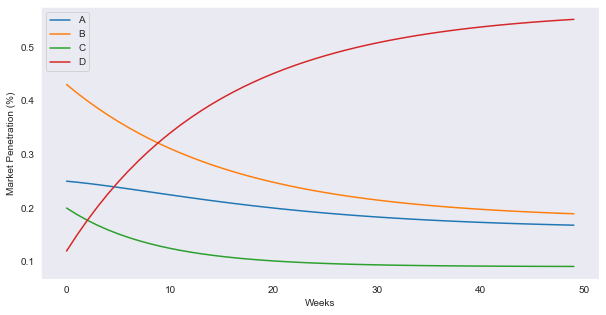

In [18]:
sns.set_style("darkgrid")

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 14

markovstates.plot()

plt.xlabel("Weeks")
plt.ylabel("Market Penetration (%)")

plt.show()